Connect colab to drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import different Libraris for 

In [ ]:
 #Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

import tensorflow as tf
from tensorflow.keras.regularizers import l2

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay

Read data 

In [ ]:


dataPath = "/content/drive/MyDrive/My Gihub projects/archive/winequalityN.csv"

In [ ]:
data = pd.read_csv(dataPath)

In [ ]:
df = data.copy()

# Viewing the data

In [ ]:


df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# 6497 rows and 13 coloum

In [ ]:
df.shape


(6497, 13)

In [ ]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

If you set inplace = True , the dropna method will modify your DataFrame directly. That means that if you set inplace = True , dropna will drop all missing values from your original dataset. It will overwrite your data, so be careful with it!

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df['type'] = df['type'].astype("category").cat.codes

In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:

df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.753520,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,0.430995,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
X = df.drop("type",axis=1)
y = df['type']

In [ ]:
# Checking for outliers in the data and removing if any

def remove_outlier(df, col_name):
    plt.figure(figsize=(20,20))
    f, axes = plt.subplots(1, 2,figsize=(12,4))
    sns.boxplot(data = df,x = col_name, ax=axes[0], color='skyblue').set_title("Before Outlier Removal: "+col_name)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    df[col_name] = df[col_name].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))
    sns.boxplot(data = df, x = col_name, ax=axes[1], color='pink').set_title("After Outlier Removal: "+col_name)
    plt.show()
    return df

<Figure size 1440x1440 with 0 Axes>

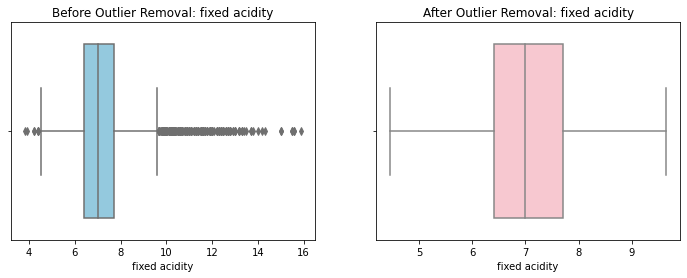

<Figure size 1440x1440 with 0 Axes>

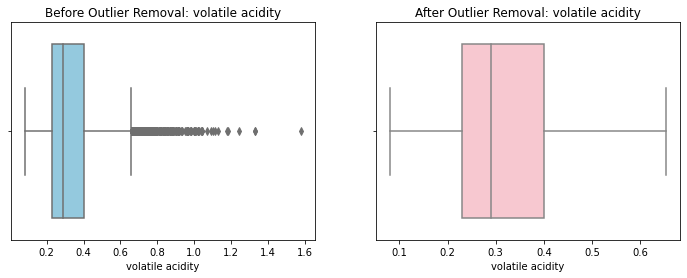

<Figure size 1440x1440 with 0 Axes>

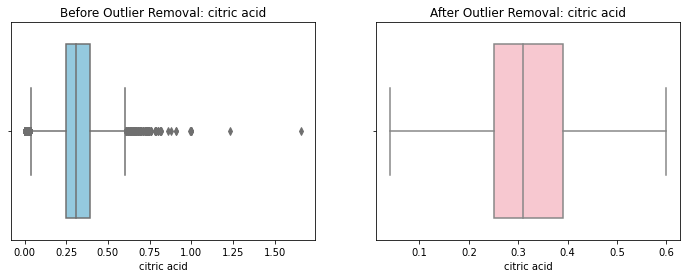

<Figure size 1440x1440 with 0 Axes>

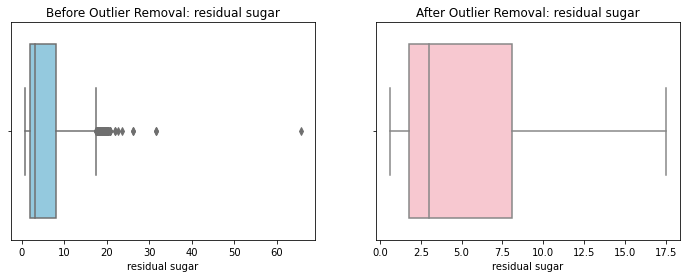

<Figure size 1440x1440 with 0 Axes>

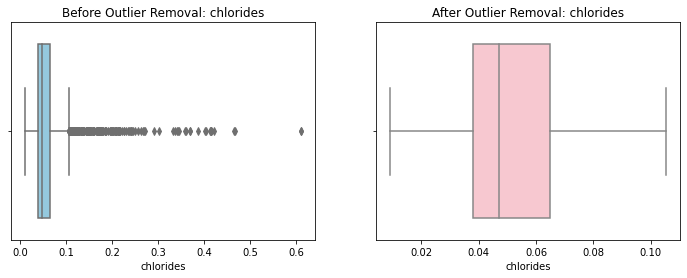

<Figure size 1440x1440 with 0 Axes>

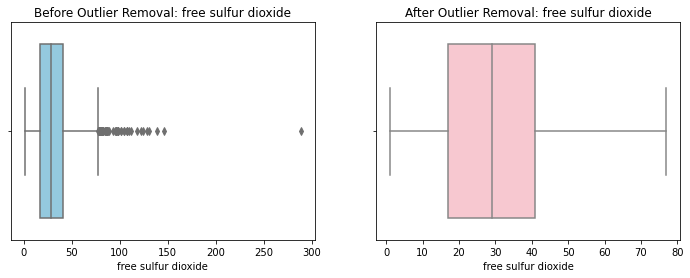

<Figure size 1440x1440 with 0 Axes>

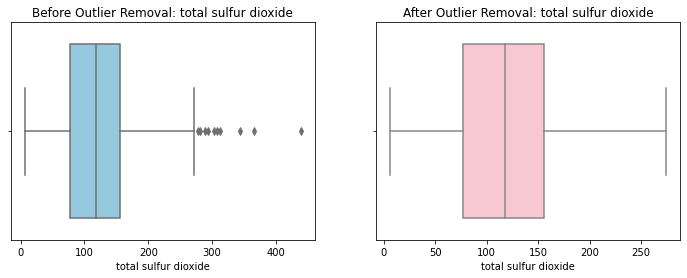

<Figure size 1440x1440 with 0 Axes>

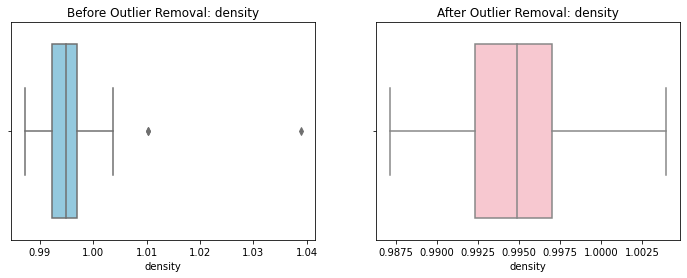

<Figure size 1440x1440 with 0 Axes>

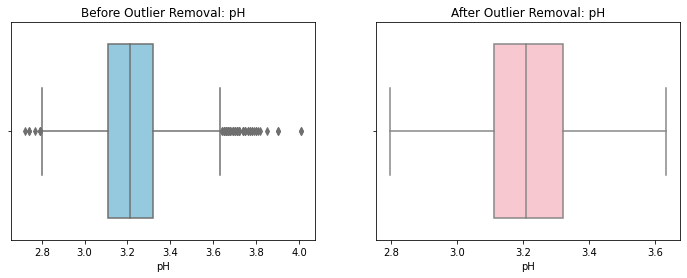

<Figure size 1440x1440 with 0 Axes>

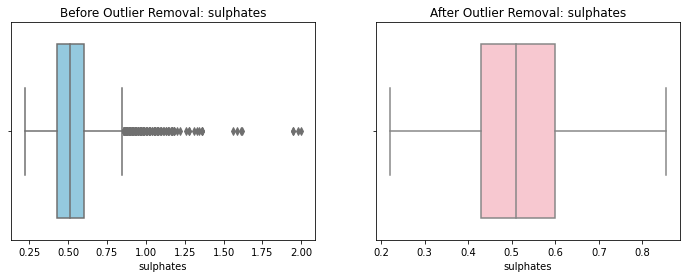

<Figure size 1440x1440 with 0 Axes>

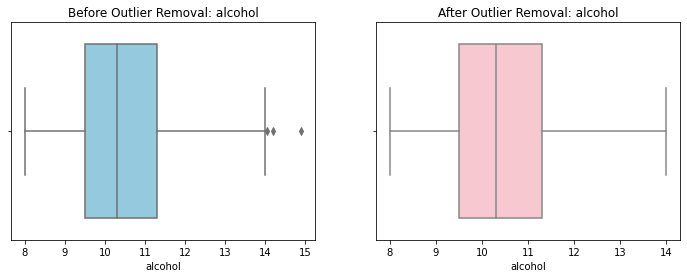

<Figure size 1440x1440 with 0 Axes>

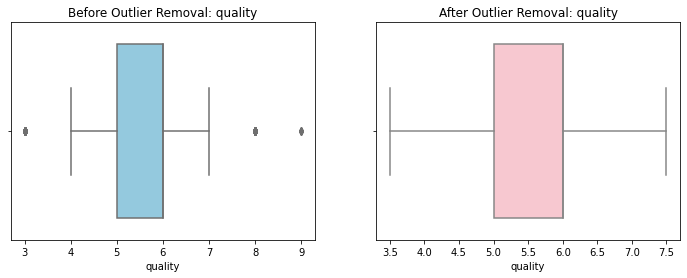

In [ ]:
for col in X.columns:
    df = remove_outlier(df,col)
plt.show()

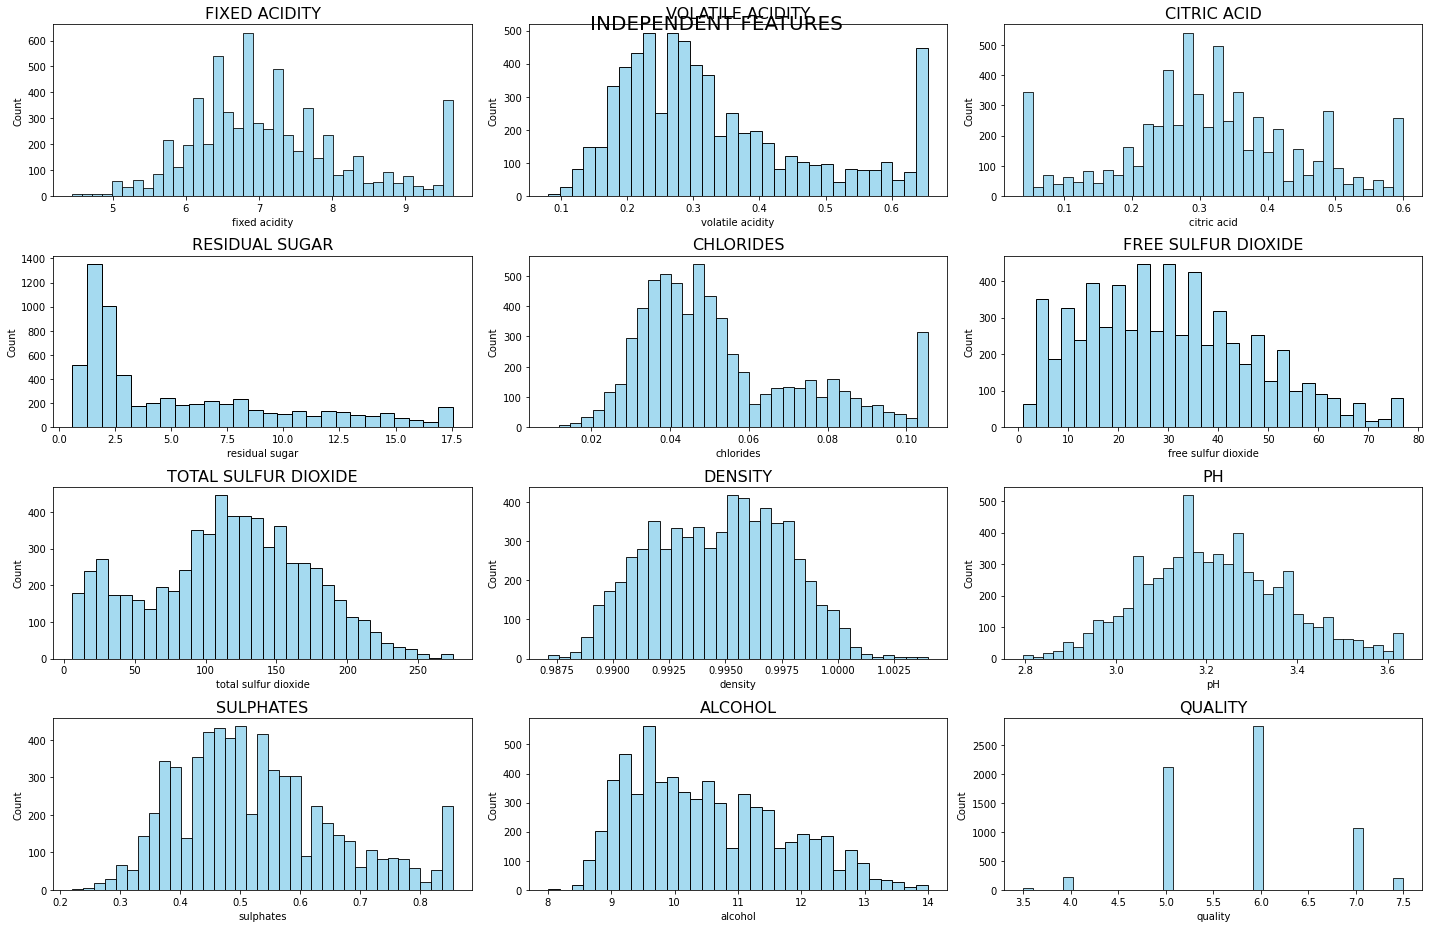

In [ ]:
# Checking the distribution of values in the feature variables

fig, axes = plt.subplots(4, 3, figsize=(20,13))
fig.suptitle('Independent Features'.upper(), fontsize=20)
feat = X.columns
f = 0
for i in range(4):
    for j in range(3):
        sns.histplot(data = df,x= feat[f],ax=axes[i,j],color="skyblue")
        axes[i,j].set_title(feat[f].upper(),fontsize=16)
        f += 1
fig.tight_layout()

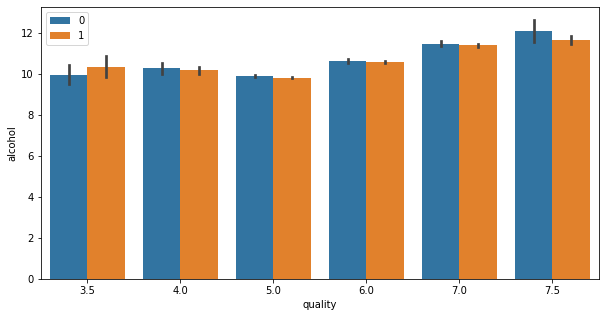

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = df,x="quality",y="alcohol",hue="type")
plt.legend(loc="best")
plt.show()

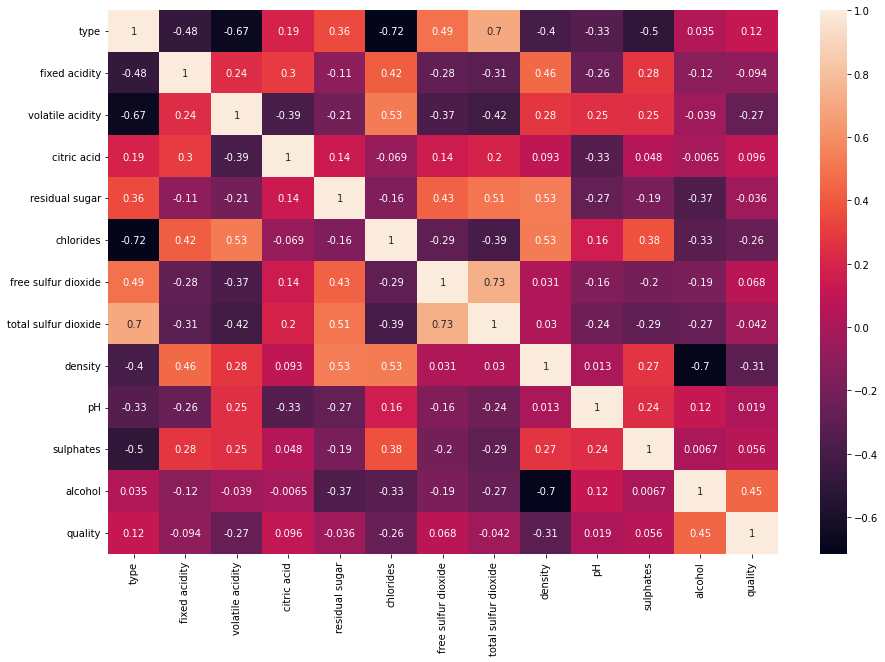

In [ ]:
# Checking the correlation of the independent features and the dependent target

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(df.corr().columns[a],df.corr().columns[b])

chlorides type
total sulfur dioxide type
total sulfur dioxide free sulfur dioxide
alcohol density


In [ ]:
X = X.drop("total sulfur dioxide",axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


In [26]:
X['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [27]:
X['quality'].mean()

5.818505338078292

In [28]:
# A feature best quality is created with quality feature and the condition of it to be best if quality is greater than 5

X['best quality'] = X['quality'].apply(lambda x: 1 if x>=5. else 0)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [29]:
X.drop("quality",axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [30]:
# Splitting the data for training and testing

X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,test_size=0.25,random_state=123)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4847, 12) (1616, 12) (4847,) (1616,)


In [31]:
# Scaling the values

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
# Defining the base learners

models = {}
# Logistic Regression
lr = LogisticRegression()
models["Logistic Regression"] = lr
# KNN
knn = KNeighborsClassifier()
models["K Neighbors Classifier"] = knn
# SVC
svc = SVC(kernel="linear")
models["Support Vector Classifier"] = svc
# Decision Tree Classifier
dtc = DecisionTreeClassifier()
models["Decision Tree Classifier"] = dtc
rf = RandomForestClassifier(n_estimators=10, criterion="entropy",random_state=0)
models["Random Forest"] = rf

In [33]:
for model in models:
    models[model].fit(X_train,y_train)

In [34]:
def model_performance(modelName,model,X_test,y_test):
    print("_______________________________________________")    
    print("Model:",modelName)
    y_pred = model.predict(X_test)
    print("Accuracy Score:",accuracy_score(y_test,y_pred))
    cm = confusion_matrix(y_test,y_pred)
    print("Confusion Matrix:\n",cm)
    cmd = ConfusionMatrixDisplay(cm,display_labels=["white","red"])
    cmd.plot()
    print("Classification Report:\n",classification_report(y_test,y_pred))
    plt.show()
    print("_______________________________________________")

_______________________________________________
Model: Logistic Regression
Accuracy Score: 0.9863861386138614
Confusion Matrix:
 [[ 390   13]
 [   9 1204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       403
           1       0.99      0.99      0.99      1213

    accuracy                           0.99      1616
   macro avg       0.98      0.98      0.98      1616
weighted avg       0.99      0.99      0.99      1616



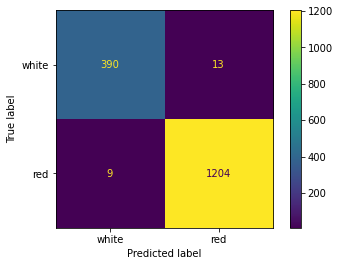

_______________________________________________
_______________________________________________
Model: K Neighbors Classifier
Accuracy Score: 0.9876237623762376
Confusion Matrix:
 [[ 391   12]
 [   8 1205]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       403
           1       0.99      0.99      0.99      1213

    accuracy                           0.99      1616
   macro avg       0.99      0.98      0.98      1616
weighted avg       0.99      0.99      0.99      1616



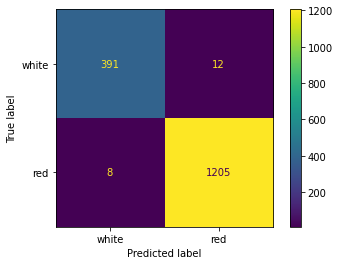

_______________________________________________
_______________________________________________
Model: Support Vector Classifier
Accuracy Score: 0.989480198019802
Confusion Matrix:
 [[ 394    9]
 [   8 1205]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       403
           1       0.99      0.99      0.99      1213

    accuracy                           0.99      1616
   macro avg       0.99      0.99      0.99      1616
weighted avg       0.99      0.99      0.99      1616



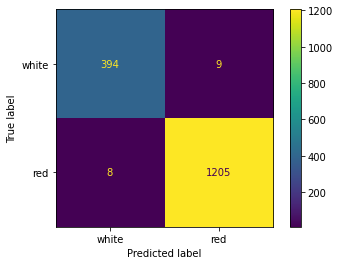

_______________________________________________
_______________________________________________
Model: Decision Tree Classifier
Accuracy Score: 0.9672029702970297
Confusion Matrix:
 [[ 381   22]
 [  31 1182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       403
           1       0.98      0.97      0.98      1213

    accuracy                           0.97      1616
   macro avg       0.95      0.96      0.96      1616
weighted avg       0.97      0.97      0.97      1616



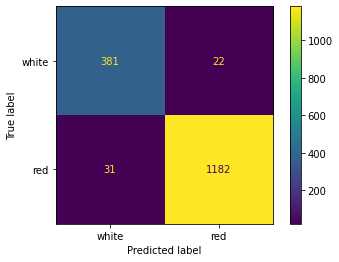

_______________________________________________
_______________________________________________
Model: Random Forest
Accuracy Score: 0.9888613861386139
Confusion Matrix:
 [[ 392   11]
 [   7 1206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       403
           1       0.99      0.99      0.99      1213

    accuracy                           0.99      1616
   macro avg       0.99      0.98      0.99      1616
weighted avg       0.99      0.99      0.99      1616



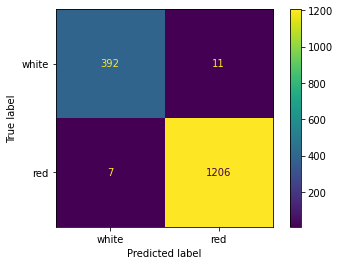

_______________________________________________


In [35]:


for model in models:
    model_performance(model,models[model],X_test,y_test)

In [36]:
models_list = []
for model_ in models:
    models_list.append((model_,models[model_]))
models_list

[('Logistic Regression', LogisticRegression()),
 ('K Neighbors Classifier', KNeighborsClassifier()),
 ('Support Vector Classifier', SVC(kernel='linear')),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Random Forest',
  RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0))]

In [37]:
# Defining the ensemble model

ensemble = VotingClassifier(estimators = models_list, voting="hard")

In [38]:
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('K Neighbors Classifier', KNeighborsClassifier()),
                             ('Support Vector Classifier',
                              SVC(kernel='linear')),
                             ('Decision Tree Classifier',
                              DecisionTreeClassifier()),
                             ('Random Forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10,
                                                     random_state=0))])

## Performance of the ensemble model

_______________________________________________
Model: Ensemble of all Base Learners
Accuracy Score: 0.9913366336633663
Confusion Matrix:
 [[ 394    9]
 [   5 1208]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       403
           1       0.99      1.00      0.99      1213

    accuracy                           0.99      1616
   macro avg       0.99      0.99      0.99      1616
weighted avg       0.99      0.99      0.99      1616



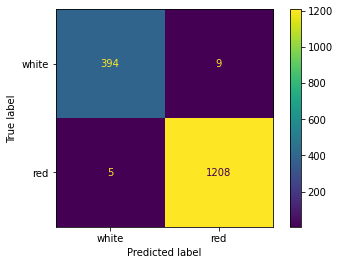

_______________________________________________


In [39]:


model_performance("Ensemble of all Base Learners",ensemble,X_test,y_test)

In [40]:
X.shape

(6463, 12)

# Defining the Artifical Neural Network

In [41]:


factor=0.0001
rate=0.4

# Model Structure
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(160,input_shape=(12,),activation="relu",kernel_regularizer=l2(factor)),
                                  tf.keras.layers.Dropout(rate),
                                  tf.keras.layers.Dense(120,activation="relu",kernel_regularizer=l2(factor)),
                                  tf.keras.layers.Dropout(rate),
                                  tf.keras.layers.Dense(80,activation='relu',kernel_regularizer=l2(factor)),
                                  tf.keras.layers.Dropout(rate),
                                  tf.keras.layers.Dense(40,activation='relu',kernel_regularizer=l2(factor)),
                                  tf.keras.layers.Dropout(rate),
                                  tf.keras.layers.Dense(20,activation='relu',kernel_regularizer=l2(factor)),
                                  tf.keras.layers.Dropout(rate),
                                  tf.keras.layers.Dense(10,activation='relu',kernel_regularizer=l2(factor)),
                                  tf.keras.layers.Dropout(rate),
                                  tf.keras.layers.Dense(units=1, activation='sigmoid')])

In [42]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get("val_accuracy")>0.95):
      print("Reached the accuracy required (ie) 90%", logs)
      self.model.stop_training=True
callback=myCallback()

In [43]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [44]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [45]:
history=model.fit(X_train, y_train, batch_size = 256,verbose=2, 
                  epochs = 100,callbacks=[callback],validation_split=0.25)

Epoch 1/100
15/15 - 5s - loss: 0.6503 - accuracy: 0.6861 - val_loss: 0.4756 - val_accuracy: 0.8210 - 5s/epoch - 312ms/step
Epoch 2/100
15/15 - 0s - loss: 0.4899 - accuracy: 0.7615 - val_loss: 0.2887 - val_accuracy: 0.9084 - 85ms/epoch - 6ms/step
Epoch 3/100
Reached the accuracy required (ie) 90% {'loss': 0.3721967339515686, 'accuracy': 0.800825297832489, 'val_loss': 0.23783829808235168, 'val_accuracy': 0.9752475023269653}
15/15 - 0s - loss: 0.3722 - accuracy: 0.8008 - val_loss: 0.2378 - val_accuracy: 0.9752 - 86ms/epoch - 6ms/step


In [46]:
y_pred=model.predict(X_test)>0.5
y_pred = y_pred.astype("int")

_______________________________________________
Model: ANN Model
Accuracy Score: 0.9801980198019802
Confusion Matrix:
 [[ 389   14]
 [  18 1195]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       403
           1       0.99      0.99      0.99      1213

    accuracy                           0.98      1616
   macro avg       0.97      0.98      0.97      1616
weighted avg       0.98      0.98      0.98      1616



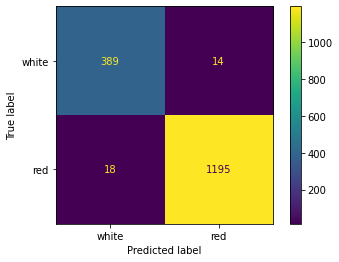

_______________________________________________


In [47]:
print("_______________________________________________")    
print("Model: ANN Model")
print("Accuracy Score:",accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
cmd = ConfusionMatrixDisplay(cm,display_labels=["white","red"])
cmd.plot()
print("Classification Report:\n",classification_report(y_test,y_pred))
plt.show()
print("_______________________________________________")